,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


100%|██████████| 61578/61578 [03:49<00:00, 268.20it/s]


[['cigar_shaped' '1586']
 ['completely_round' '12039']
 ['different_shape' '12930']
 ['in_between' '13068']
 ['on_edge' '6680']
 ['spiral' '15216']
 ['star_or_artifact' '59']]


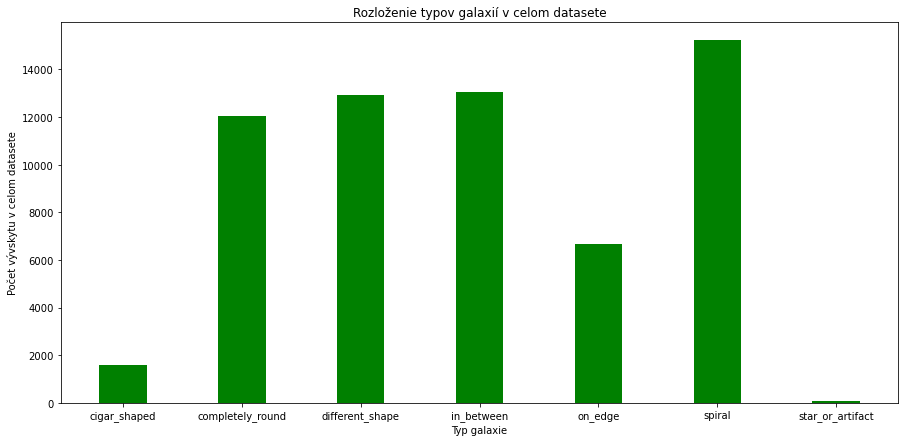

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os
import shutil
import glob
import random
from tqdm import tqdm
from numpy import *


import matplotlib.pyplot as plt

#do df si nacitame datovu tabulku Rozdelenia pravdepodobností pre klasifikácie pre každý obrazok galaxie


df = pd.read_csv('training_solutions_rev1.csv')


#df.iloc[:, 1:] = df.iloc[:, 1:].round(2)

display(df)

#pomocou rozhodovacieho algoritmu prejdeme vsetky odpovede a na zaklade diagramu ktory popisuje data (https://data.galaxyzoo.org/gz_trees/gz_trees.html) 
# priradime kazdej galaxii jej typ... rozhodujeme sa klasickym porovnavanim odopvedi, vacsie percento vyhrava

"""tabulka = ["completely round" == 0,
           "in between"          == 1,
           "cigar-shaped"        == 2, vyhodit 
           "on edge"             == 3,
           "spiral"              == 4,
           "different shape"     == 5, vyhodit
           "star or artifact"    == 6] vyhodit""" 

def shape_of_gal(dataframe, gal_id):
    
    galaxy_id = [gal_id]
    
    selected_row = dataframe.loc[dataframe['GalaxyID'].isin(galaxy_id)]
    

    class_1 = selected_row[["Class1.1" , 'Class1.2' , 'Class1.3']].astype(float)
    Q_1 = class_1.idxmax(axis=1)
    Q_1 = Q_1.to_string()
    Q_1 = Q_1[Q_1.find('C'):]
    
    
    
    
    if Q_1 == "Class1.1":
        class_7 = selected_row[["Class7.1" , 'Class7.2' , 'Class7.3']].astype(float)
        Q_7 = class_7.idxmax(axis=1)
        Q_7 = Q_7.to_string()
        Q_7 = Q_7[Q_7.find('C'):]
        
        if Q_7 == "Class7.1":
            #print("completely round")
            vysledok = "completely_round"
        elif Q_7 == "Class7.2":
            #print("in between")
            vysledok = "in_between"
        else:
            #print("cigar-shaped")
            vysledok = "cigar_shaped"
        
    elif Q_1 == "Class1.2":
        class_2 = selected_row[["Class2.1" , 'Class2.2']].astype(float)
        Q_2 = class_2.idxmax(axis=1)
        Q_2 = Q_2.to_string()
        Q_2 = Q_2[Q_2.find('C'):]
        
        if Q_2 == "Class2.1":
            #print("on edge")
            vysledok = "on_edge"
        else:
            class_4 = selected_row[["Class4.1" , 'Class4.2']].astype(float)
            Q_4 = class_4.idxmax(axis=1)
            Q_4 = Q_4.to_string()
            Q_4 = Q_4[Q_4.find('C'):]
            
            if Q_4 == "Class4.1":
                #print("spiral")
                vysledok = "spiral"
            else: 
                #print("different shape")
                vysledok = "different_shape"
        
      

    else:
        #print("star or artifact")
        vysledok = "star_or_artifact"
        
    return vysledok


def assign_gal_type(dataframe):
       
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)   
    vysledky = []
    
    for i in tqdm(ids):
        x = shape_of_gal(dataframe, i)
        vysledky.append(x)
    vysledky = np.array(vysledky)
    return vysledky    


types =  assign_gal_type(df)


df['type'] = types

#df.to_csv('df_with_types.csv', index=False)

# vypiseme, kolko ktorych tried obsahuje cely dataset
unique, counts = np.unique(types, return_counts=True)
print (np.asarray((unique, counts)).T)

fig = plt.figure(figsize = (15, 7)) 
  
# creating the bar plot 
plt.bar(unique, counts, color ='green',  
        width = 0.4)

  
plt.xlabel("Typ galaxie") 
plt.ylabel("Počet vývskytu v celom datasete") 
plt.title("Rozloženie typov galaxií v celom datasete") 
plt.show() 

In [19]:

print("pocet galaxii v celom datasete na zaciatku: ", len(df))

#kedze nechceme nerozhodne zaklasifikovane galaxie, odstranime z celeho datasetu tie, pri ktorych si boli ludia isti na menej ako 80%
#df_with_types = df
#df = pd.read_csv('df_with_types.csv')

df = df[(df['Class1.1'] >= 0.80) |
        (df['Class1.2'] >= 0.80)]

df = df[(df['Class7.1'] >= 0.80) | 
        (df['Class7.2'] >= 0.80) |
        (df['Class2.1'] >= 0.80) |
        (df['Class4.1'] >= 0.80) ]

print("pocet galaxii v celom datasete po odfiltrovani tych s mensou pravdepodobnostou ze patria do jednej z tried ako 80%: ", len(df))

types = df['type']

unique, counts = np.unique(types, return_counts=True)
print (np.asarray((unique, counts)).T)


# vidime ze ked sme nehcali len galaxie, ktore boli klasifikovane z vacsou presnostou ako 0.5 tak sa nam dataset zmensil z 61578 na 8505
# teraz si este zmensime dataset tak, ze odstranime tie typy, ktorych klasifikacia nie je cielom nasej prace, chceme nechat iba
# "Completely round", "In between", "on edge" a "spiral"


columns_mapper = {
    'GalaxyID': 'GalaxyID',
    'Class7.1': 'completely_round',
    'Class7.2': 'in_between',
    'Class2.1': 'on_edge',
    'Class4.1': 'spiral'
}

columns = list(columns_mapper.values())
df = df.rename(columns=columns_mapper)[columns]
#df.set_index('GalaxyID', inplace=True)
display(df)


# teraz uz mame len 4 atributy pre kazdy typ galaxie a kazdy obsahuje percentualnu pravdepodobnost, ze dany obrazok patri do tej triedy
# teraz si mozeme rozdelit data na trenovaciu a testovaciu cast

pocet galaxii v celom datasete na zaciatku:  61578
pocet galaxii v celom datasete po odfiltrovani tych s mensou pravdepodobnostou ze patria do jednej z tried ako 80%:  8505
[['completely_round' 1258]
 ['in_between' 685]
 ['on_edge' 1769]
 ['spiral' 4793]]


,GalaxyID,completely_round,in_between,on_edge,spiral
19,100322,0.000000,0.000000,0.816806,0.000000
22,100380,0.000000,0.027210,0.043650,0.926350
42,100673,0.000000,0.033635,0.029610,0.901288
48,100765,0.031908,0.037913,0.000000,0.928216
50,100801,0.006999,0.027998,0.000000,0.875162
...,...,...,...,...,...
61534,999264,0.000000,0.025805,0.000000,0.926202
61536,999289,0.000000,0.000000,1.000000,0.000000
61544,999415,0.022477,0.000000,0.043745,0.933778
61549,999502,0.000000,0.020911,0.046845,0.909171


[['completely_round' 1258]
 ['in_between' 685]
 ['on_edge' 1769]
 ['spiral' 4793]]


<ipython-input-20-42ae7a6a51af>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(counts, labels=unique, loc='center left', bbox_to_anchor=(-0.1, 1.),


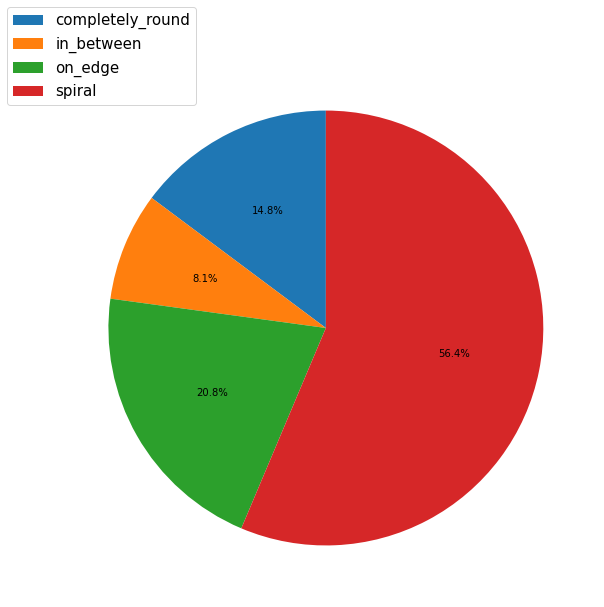

In [20]:
# vizualizujeme ako mame rozdeleny dataset teraz, kolko akych typov galaxii


blacha = df[["completely_round", "in_between", "on_edge", "spiral"]]
#display(df)
#max_value = blacha.max(axis=1)

typy_gal = blacha.idxmax(axis=1)

unique, counts = np.unique(typy_gal, return_counts=True)
print (np.asarray((unique, counts)).T)

fig = plt.figure(figsize = (10, 10)) 
  
# creating the bar plot 

plt.pie(counts, autopct='%1.1f%%', startangle=90)
plt.legend(counts, labels=unique, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
  
plt.show() 


In [27]:
#rozdelime si data na trenovaci dataset a testovaci v pomere 80:20 a vytvorime nove priecinky kde skopirujeme obrazky na trenovanie a testovanie modelu


df_trenovacia, df_testovacia = train_test_split(df, test_size=.2, random_state=42)



def vytvor_testovaciu_mnozinu():
    
    os.mkdir('testovacie_data_nad_80')
    
    #to_be_moved = random.sample(glob.glob("./images_training_rev1/*.jpg"), 6944)
    
    images_names = df_testovacia["GalaxyID"]
    
    to_be_moved = []
    
    for i in images_names:
        to_be_moved.append('./images_training_rev1/' + str(i) + ".jpg")

    for f in enumerate(to_be_moved, 1):
        dest = "./testovacie_data_nad_80"
        shutil.copy(f[1], dest)
        
    print("TESTOVACIA mnozina vytvorena, velkost: ", len(os.listdir('./testovacie_data_nad_80')))

vytvor_testovaciu_mnozinu()



def vytvor_trenovaciu_mnozinu():
    
    os.mkdir('trenovacie_data_nad_80')
    
    #to_be_moved = random.sample(glob.glob("./images_training_rev1/*.jpg"), 6944)
    
    images_names = df_trenovacia["GalaxyID"]
    
    to_be_moved = []
    
    for i in images_names:
        to_be_moved.append('./images_training_rev1/' + str(i) + ".jpg")

    for f in enumerate(to_be_moved, 1):
        dest = "./trenovacie_data_nad_80"
        shutil.copy(f[1], dest)
        
    print("TRENOVACIA mnozina vytvorena, velkost: ", len(os.listdir('./trenovacie_data_nad_80')))

vytvor_trenovaciu_mnozinu()


TESTOVACIA mnozina vytvorena, velkost:  1701
TRENOVACIA mnozina vytvorena, velkost:  6804


In [28]:
# vytvorenie rotacii trenovacich obrazkov

from PIL import Image

path_img = "./trenovacie_data_nad_80"

def rotateImages(rotationAmt1, rotationAmt2):
  # for each image in the current directory
  for image in os.listdir(path_img):
    # open the image
    img = Image.open("./trenovacie_data_nad_80/" + image)
    # rotate and save the image with the same filename
    img.rotate(rotationAmt1).save('./trenovacie_data_nad_80/' +image[0:6]+
                                  '_' + str(rotationAmt1)   +'.jpg' , 'JPEG')
    img.rotate(rotationAmt2).save('./trenovacie_data_nad_80/' +image[0:6]+
                                  '_' + str(rotationAmt2)   +'.jpg' , 'JPEG')
    # close the image
    img.close()
    


rotateImages(90, 270)


In [31]:
rotation_names = df_trenovacia["GalaxyID"]



velka_df1 = pd.read_csv('./training_solutions_rev1.csv')



velka_df1 = velka_df1.loc[velka_df1['GalaxyID'].isin(rotation_names)]





velka_df2 = pd.read_csv('./training_solutions_rev1.csv')
velka_df2 = velka_df2.loc[velka_df2['GalaxyID'].isin(rotation_names)]

velka_df2['GalaxyID'] =  velka_df2['GalaxyID'].astype(str) + '_90'




velka_df3 = pd.read_csv('./training_solutions_rev1.csv')
velka_df3 = velka_df3.loc[velka_df3['GalaxyID'].isin(rotation_names)]
velka_df3['GalaxyID'] =  velka_df3['GalaxyID'].astype(str) + '_270'


tabulky = [velka_df1, velka_df2, velka_df3 ]

velka_df = pd.concat(tabulky, ignore_index=True)


velka_df['GalaxyID'] = velka_df['GalaxyID'].astype(str)

velka_df.to_csv('merged_tables.csv', index=False)

print(len(velka_df))

20412


,GalaxyID,completely_round,in_between,on_edge,spiral
0,100322,0.000000,0.000000,0.816806,0.000000
1,100380,0.000000,0.027210,0.043650,0.926350
2,100673,0.000000,0.033635,0.029610,0.901288
3,100765,0.031908,0.037913,0.000000,0.928216
4,100801,0.006999,0.027998,0.000000,0.875162
...,...,...,...,...,...
20407,999137_270,0.000000,0.000000,0.018000,0.982000
20408,999264_270,0.000000,0.025805,0.000000,0.926202
20409,999289_270,0.000000,0.000000,1.000000,0.000000
20410,999415_270,0.022477,0.000000,0.043745,0.933778


  0%|          | 11/16329 [00:00<02:40, 101.86it/s]

(16329, 5) (4083, 5)
(20412, 5)


100%|██████████| 4083/4083 [00:43<00:00, 93.18it/s] 


(16329, 64, 64, 3) (16329, 4)


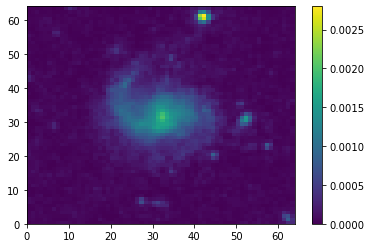

In [32]:
############## cast 2 priprava obrazkov na modelovanie

from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
#%matplotlib inline




df = velka_df

columns_mapper = {
    'GalaxyID': 'GalaxyID',
    'Class7.1': 'completely_round',
    'Class7.2': 'in_between',
    'Class2.1': 'on_edge',
    'Class4.1': 'spiral'
}

columns = list(columns_mapper.values())
df = df.rename(columns=columns_mapper)[columns]
#df.set_index('GalaxyID', inplace=True)
display(df)



len(df)

df_train, df_test = train_test_split(df, test_size=.2) #rozdelenie na trenovaciu a validacnu vzorku

print(df_train.shape, df_test.shape)

print(df.shape)



ORIG_SHAPE = (424,424)  #originalna velkost obrazkov
CROP_SIZE = (256,256)   #zaijumaa nas hlavne stred, tak si ich orezeme
IMG_SHAPE = (64,64,3)   #orezenym obrazkom znizime rozlisenie na 64x64x3... 3 to predstavuje RGB


#funkcia na upravu obrazku do pozadovaneho stavu
def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x

#funkcia na upravu vsetkych obrazkov z daneho datasetu na numpy polia , aby ich pocitac vedel precitat
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('./trenovacie_data_nad_80/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    #x_batch = np.asarray(x_batch).astype(np.float32)
    return x_batch, y_batch

X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

print(X_train.shape, y_train.shape)


#priklad obrazku po uprave
plt.pcolormesh(X_train[12,:,:,0])
print(plt.colorbar())

In [33]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten
from tensorflow.keras.layers import Dense, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras import backend as K
#from tensorflow.keras.optimizers import Adam
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(Conv2D(256, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Conv2D(128, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Conv2D(128, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())


model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('sigmoid'))

#adam = Adam()
#model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.compile(loss='binary_crossentropy', 
              optimizer='adamax', 
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='root_mean_squared_error')])
print(model.summary())

# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

saved_model = "model_exp2.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(saved_model, 
                                                monitor='val_root_mean_squared_error', 
                                                verbose=1, save_best_only=True, mode='min')



train_datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True)

batch_size = 128
history = model.fit(train_datagen.flow(X_train,y_train,
                                       shuffle=False),
                    epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 256)       590080    
_________________________________________________________________
activation (Activation)      (None, 60, 60, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 128)       0

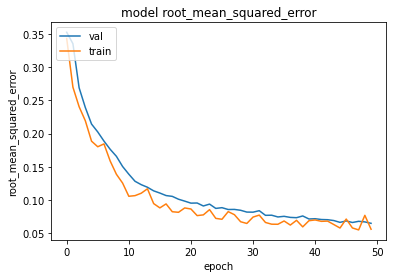

128/128 [==============================] - 2s 17ms/step - loss: 0.1395 - root_mean_squared_error: 0.0561
root_mean_squared_error: 5.61%


In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend([ 'val', 'train',], loc='upper left')
plt.show()

# loss, acc = model.evaluate(X_test, y_test, verbose=1)
# print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

scores = model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [35]:
############ predikovanie galaxii

from tensorflow.keras.models import load_model

def test_image_generator(ids, shape=IMG_SHAPE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
    x_batch = []
    for i in ids:
        x = get_image('./testovacie_data_nad_80/'+i, x1, y1, shape=IMG_SHAPE, crop_size=CROP_SIZE)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch


val_files = os.listdir('./testovacie_data_nad_80/')
val_predictions = []
N_val = len(val_files)

model = load_model('model_exp2.hdf5')

for i in tqdm(np.arange(0, N_val, batch_size)):
    if i+batch_size > N_val:
        upper = N_val
    else:
        upper = i+batch_size
    X = test_image_generator(val_files[i:upper])
    y_pred = model.predict(X)
    val_predictions.append(y_pred)

val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)
ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_df = submission_df.sort_values(by=['GalaxyID'])
submission_df.to_csv('sample_sub_testovacie_data_nad_80.csv', index=False)

print(submission_df.head())

100%|██████████| 14/14 [00:25<00:00,  1.82s/it]

     GalaxyID completely_round   in_between        on_edge        spiral
152    101181    0.00020273804  0.000471191     0.87941825  0.0057700914
46     102243      0.004297649  0.015220337    0.024811696    0.92055714
243    102402      0.014429621  0.028248109    0.017222274    0.89881104
289    102474      0.013119562  0.020176297    0.021404302    0.90570146
1453   102928        0.8662714  0.040239967  0.00071372394  0.0014012861


In [36]:
################# VYHODNOTENIE

#submission = pd.read_csv('sample_sub_testovacie_data_nad_80.csv')

submission = submission_df

display(submission)

submission_ids = submission["GalaxyID"].tolist()

#print(submission_ids)

original_training_data = pd.read_csv('./training_solutions_rev1.csv')

test_df = original_training_data.loc[original_training_data['GalaxyID'].isin(submission_ids)]

test_df['GalaxyID'] = test_df['GalaxyID'].astype(str)


columns_mapper = {
    'GalaxyID': 'GalaxyID',
    'Class7.1': 'completely_round',
    'Class7.2': 'in_between',
    'Class2.1': 'on_edge',
    'Class4.1': 'spiral'
}

columns = list(columns_mapper.values())
test_df = test_df.rename(columns=columns_mapper)[columns]

#display(test_df)
#display(submission)



submission.set_index('GalaxyID', inplace=True)
test_df.set_index('GalaxyID', inplace=True)

predikovana = submission.astype(float).idxmax(axis=1)
testovacia = test_df.astype(float).idxmax(axis=1)

unique, counts = np.unique(testovacia, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique(predikovana, return_counts=True)
print (np.asarray((unique, counts)).T)

,GalaxyID,completely_round,in_between,on_edge,spiral
152,101181,0.00020273804,0.000471191,0.87941825,0.0057700914
46,102243,0.004297649,0.015220337,0.024811696,0.92055714
243,102402,0.014429621,0.028248109,0.017222274,0.89881104
289,102474,0.013119562,0.020176297,0.021404302,0.90570146
1453,102928,0.8662714,0.040239967,0.00071372394,0.0014012861
...,...,...,...,...,...
620,995978,0.004931682,0.019056661,0.028261011,0.9083452
108,995993,0.0035060265,0.018073404,0.0332724,0.9080294
500,996854,0.0033219117,0.007089671,0.019097699,0.9432533
1512,998245,0.0064899423,0.01356435,0.023648992,0.9198535


[['completely_round' 266]
 ['in_between' 138]
 ['on_edge' 341]
 ['spiral' 956]]
[['completely_round' 268]
 ['in_between' 144]
 ['on_edge' 339]
 ['spiral' 950]]


<ipython-input-36-b5ef96d445c7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GalaxyID'] = test_df['GalaxyID'].astype(str)


[[262   3   0   1]
 [  2 134   1   1]
 [  0   1 338   2]
 [  4   6   0 946]]
Recall:  [0.98496241 0.97101449 0.99120235 0.98953975]
Precision:  [0.97761194 0.93055556 0.99705015 0.99578947]
                  precision    recall  f1-score   support

completely round       0.98      0.98      0.98       266
      in between       0.93      0.97      0.95       138
         on edge       1.00      0.99      0.99       341
          spiral       1.00      0.99      0.99       956

        accuracy                           0.99      1701
       macro avg       0.98      0.98      0.98      1701
    weighted avg       0.99      0.99      0.99      1701



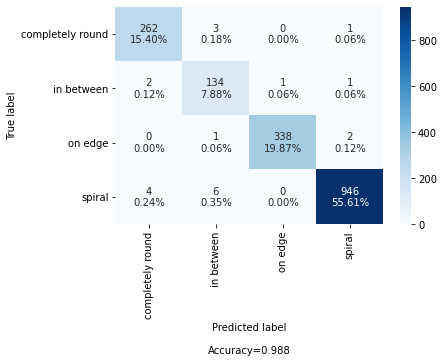

In [37]:
#################### METRIKY 

import seaborn as sn
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix



import os
import shutil
import glob
import random
from tqdm import tqdm
from numpy import *


import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,
                                                                group_counts,
                                                                group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",
                cmap=cmap,cbar=cbar,
                xticklabels=categories,
                yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

conf_mat = confusion_matrix(testovacia, predikovana)       
print(conf_mat)
#sn.heatmap(conf_mat, annot=True)

categories = ['completely round', 'in between', 'on edge', 'spiral']
make_confusion_matrix(conf_mat,
                      categories=categories)

from sklearn.metrics import recall_score
print("Recall: ", recall_score(testovacia, predikovana, average=None))

print("Precision: ", precision_score(testovacia, predikovana, average=None))

from sklearn.metrics import classification_report
print(classification_report(testovacia, predikovana, target_names=categories))